In [ ]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, geom_segment, ggtitle, geom_hline

from sklearn.linear_model import LinearRegression

# Set the seed for reproducibility
np.random.seed(42)

In [540]:
def generate_data(sigma):
    X = np.linspace(start=1, stop=10, num=100).reshape(-1, 1) #for sure 1 column, -1 means 'infer the # of rows'

    # Define the model parameters
    beta0 = 4
    beta1 = 3
    
    # Generate epsilon as a 1D array of noise values
    epsilon = sigma * np.random.randn(100)
    
    # Calculate y using element-wise operations
    y = beta0 + beta1 * X.flatten() + epsilon

    return X, y 

In [542]:
def ss_decomp(X, y):

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate the mean of y
    y_mean = np.mean(y)

    #calculate SS quantities
    SST = np.sum((y - y_mean) ** 2).round(4)
    SSR = np.sum((y_pred - y_mean) ** 2).round(4)
    SSE = np.sum((y - y_pred) ** 2).round(4)

    # Output the sum of squares decomposition
    print(f"SST (Total Sum of Squares): {SST}")
    print(f"SSR (Regression Sum of Squares): {SSR}")
    print(f"SSE (Error Sum of Squares): {SSE}")
    print(f"SST = SSR + SSE: {np.isclose(SST, SSR + SSE)}")
    
    print(f"Coefficient of Determination, R^2 is: {np.round(1-SSE/SST, 4)}")
    
    #make a ggplot
    df = pd.DataFrame({
        'X': X.flatten(),
        'y': y,
        'predicted': y_pred,
        'y_mean':  y_mean
    })

    gg1 = (
        ggplot(df, aes(x = 'X', y = 'y')) + 
        geom_point() + 
        #geom_smooth(method = "lm", formula = "y ~ x", se = False) +
        geom_hline(yintercept=y_mean, linetype='dashed') + 
        geom_segment(aes(xend = 'X', yend = 'y_mean'), color = "black") + 
        ggtitle(f"R^2 is {np.round(1-SSE/SST, 4)}")
        )

    return gg1

In [544]:
X, y = generate_data(sigma = 2)
ss_decomp(X, y)

SST (Total Sum of Squares): 6650.9834
SSR (Regression Sum of Squares): 6325.0215
SSE (Error Sum of Squares): 325.9619
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.951


AttributeError: 'facet_null' object has no attribute 'make_axes'

AttributeError: 'facet_null' object has no attribute 'make_axes'

<Figure size 1280x960 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

In [546]:
X, y = generate_data(sigma = 5)
ss_decomp(X, y)

SST (Total Sum of Squares): 8495.0014
SSR (Regression Sum of Squares): 6244.1137
SSE (Error Sum of Squares): 2250.8877
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.735


AttributeError: 'facet_null' object has no attribute 'make_axes'

AttributeError: 'facet_null' object has no attribute 'make_axes'

<Figure size 1280x960 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

SST (Total Sum of Squares): 17334.6312
SSR (Regression Sum of Squares): 8049.0934
SSE (Error Sum of Squares): 9285.5378
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.4643


/opt/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


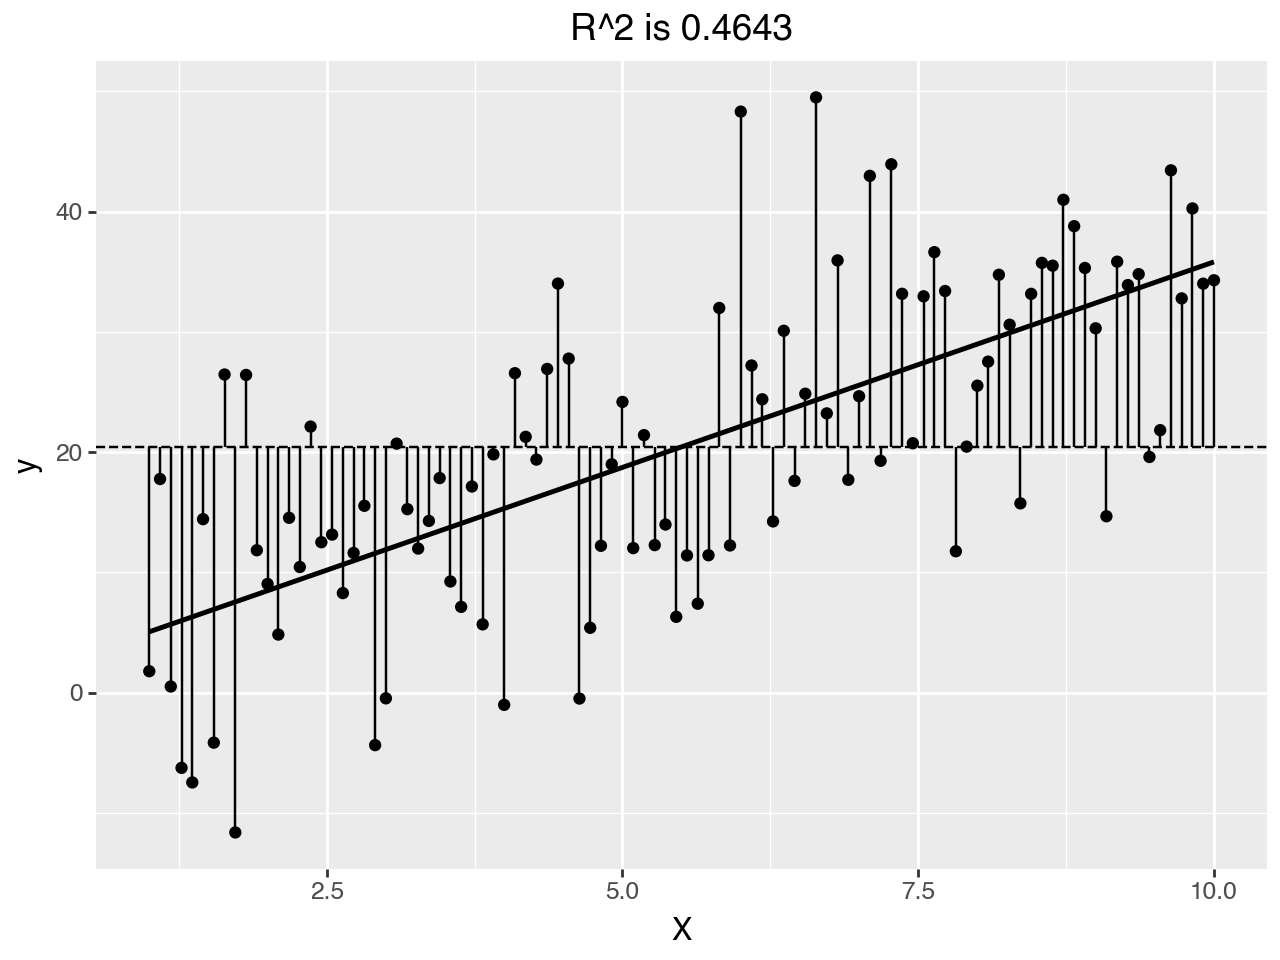

/opt/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


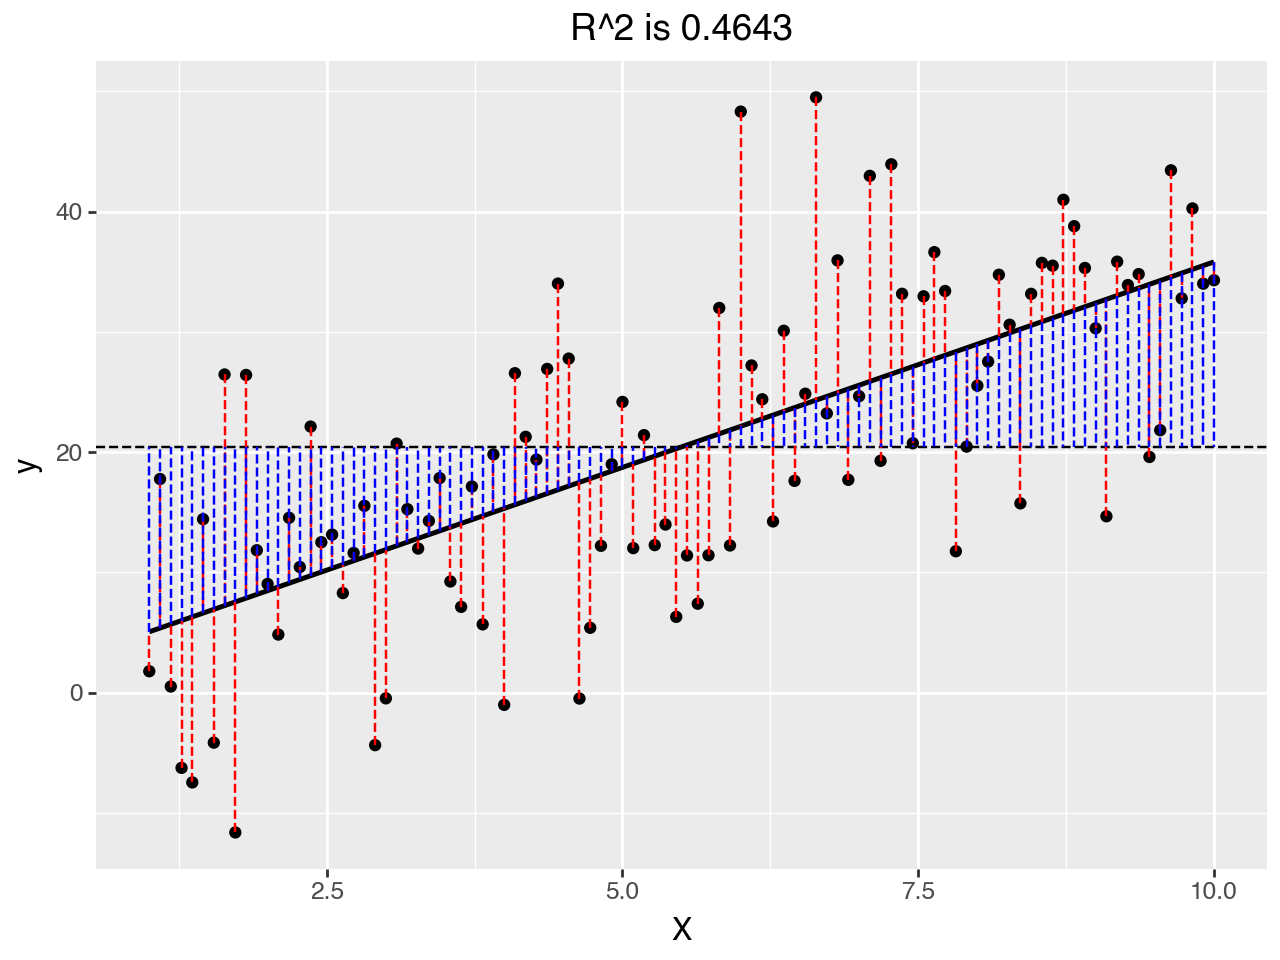

(<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>)

In [428]:
X, y = generate_data(sigma = 10)
ss_decomp(X, y)

/opt/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


SST (Total Sum of Squares): 899724.7168
SSR (Regression Sum of Squares): 54052.29
SSE (Error Sum of Squares): 845672.4267
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.0601


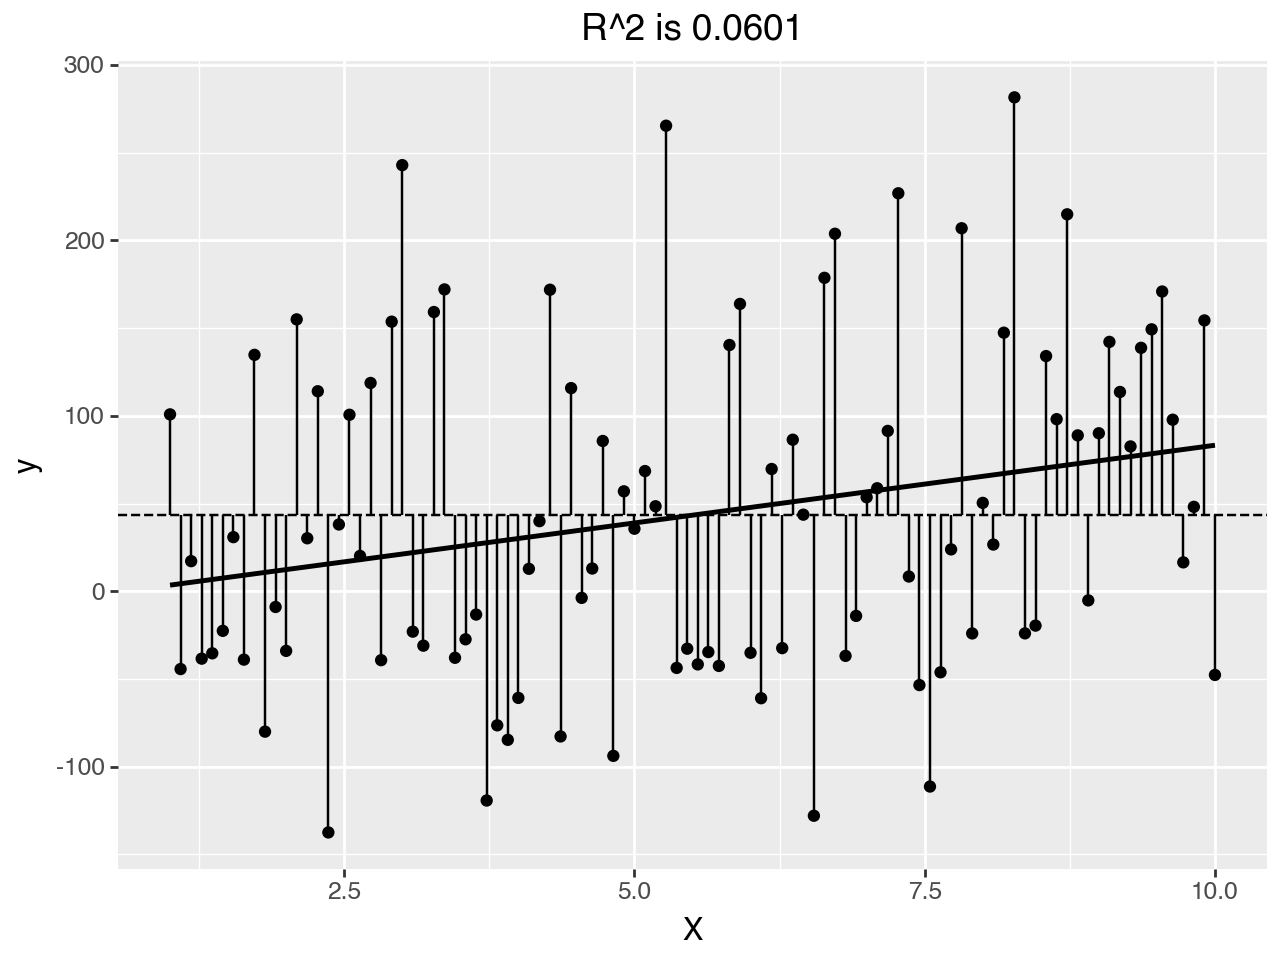

/opt/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


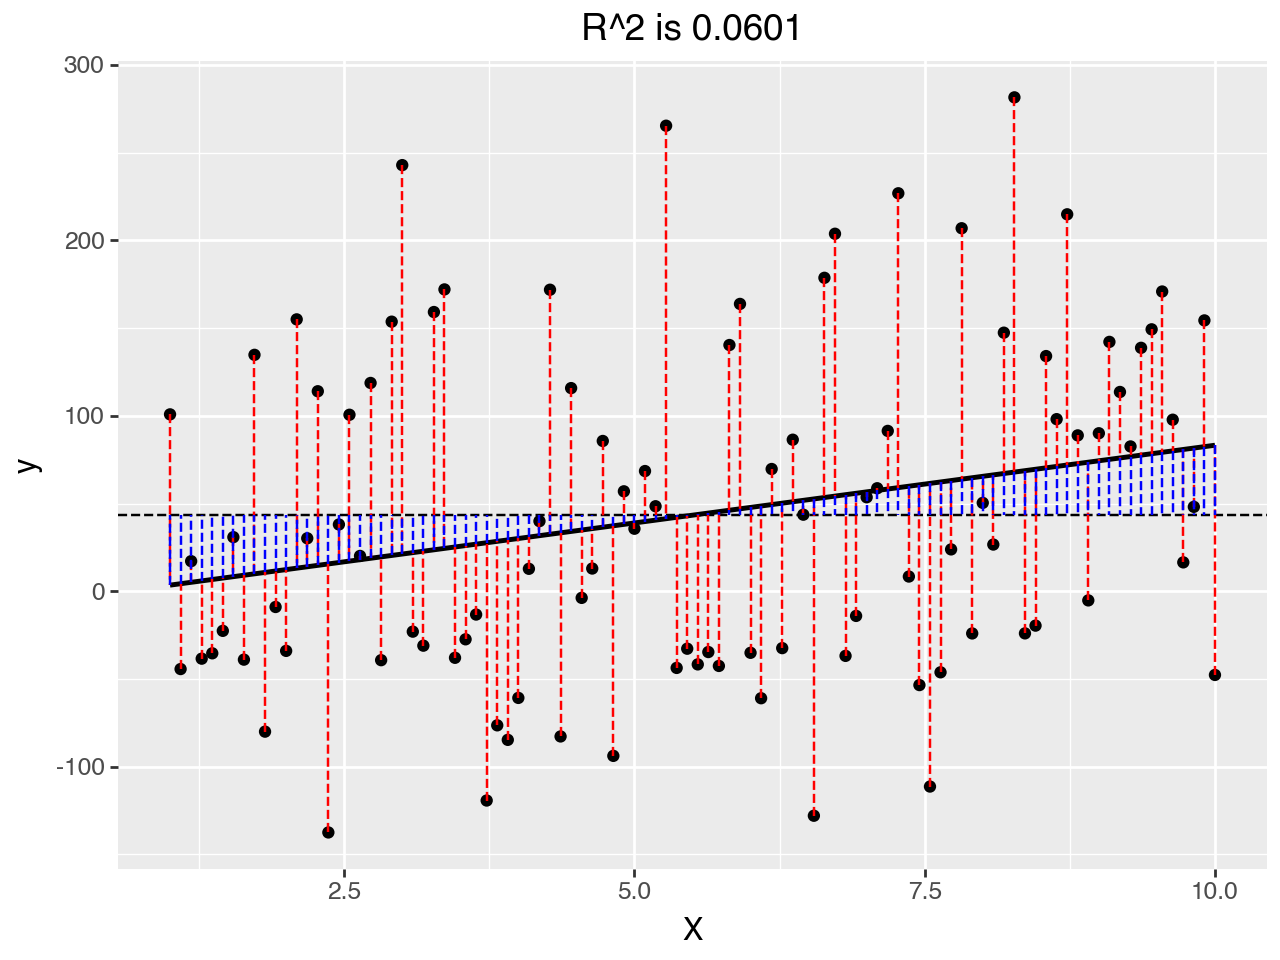

(<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>)

In [429]:
X, y = generate_data(sigma = 100)
ss_decomp(X, y)